In [1]:
import pandas as pd

pinkwink_web = pd.read_csv("/content/drive/MyDrive/data/DataScience-master/DataScience-master/data/08. PinkWink Web Traffic.csv",encoding='utf-8',thousands=",",names=['date','hit'],index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web["hit"].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


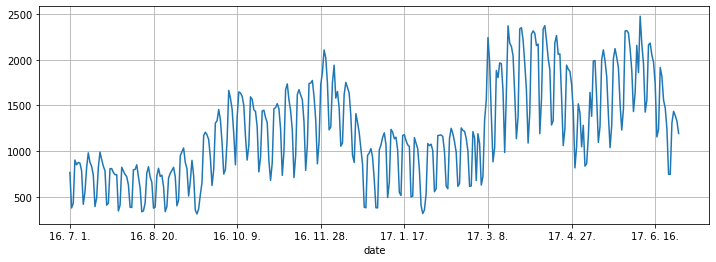

In [2]:
pinkwink_web["hit"].plot(figsize=(12,4),grid=True)

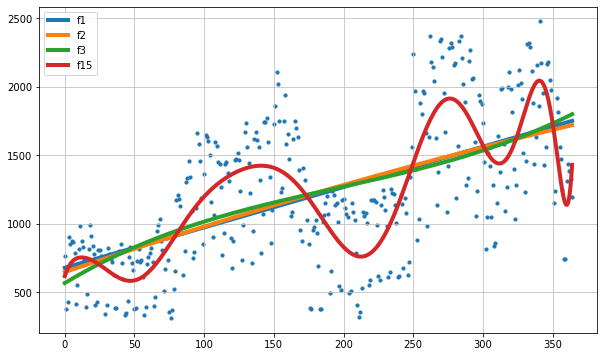

In [3]:
import numpy as np
import matplotlib.pyplot as plt

time = np.arange(0,len(pinkwink_web))
traffic = pinkwink_web["hit"].values

fx = np.linspace(0,time[-1],1000)

def error(f, x, y):
  return np.sqrt(np.mean((f(x)-y)**2))

fp1 = np.polyfit(time,traffic, 1)
f1 = np.poly1d(fp1)

fp2 = np.polyfit(time,traffic, 2)
f2 = np.poly1d(fp2)

fp3 = np.polyfit(time,traffic, 3)
f3 = np.poly1d(fp3)

fp15 = np.polyfit(time,traffic, 15)
f15 = np.poly1d(fp15)

plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label="f1")
plt.plot(fx, f2(fx), lw=4, label="f2")
plt.plot(fx, f3(fx), lw=4, label="f3")
plt.plot(fx, f15(fx), lw=4, label="f15")

plt.grid(True, linestyle="-",color="0.75")
plt.legend(loc=2)
plt.show()

In [10]:
from fbprophet import Prophet

df = pd.DataFrame({"ds":pinkwink_web.index, 'y':pinkwink_web["hit"]})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'],format="%y. %m. %d.")
del df['date']

m = Prophet(yearly_seasonality=True)
m.fit(df)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


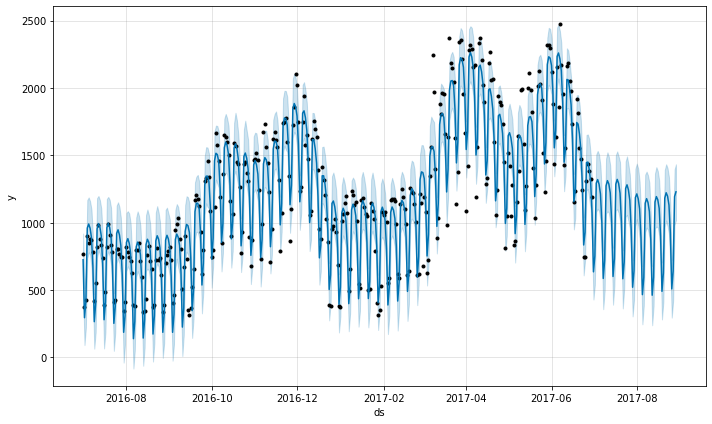

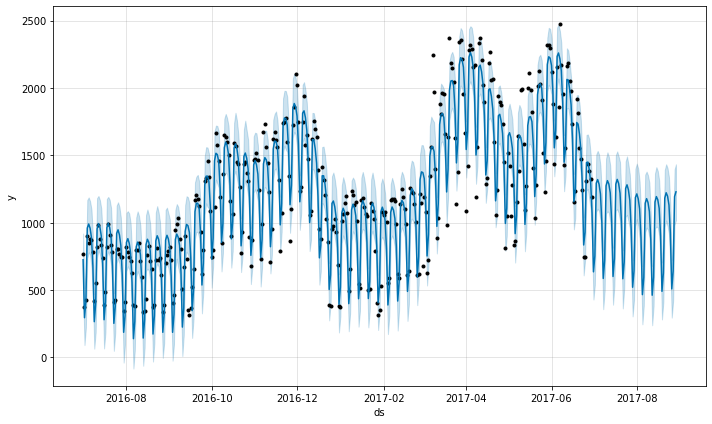

In [12]:
forecast = m.predict(future)
m.plot(forecast)

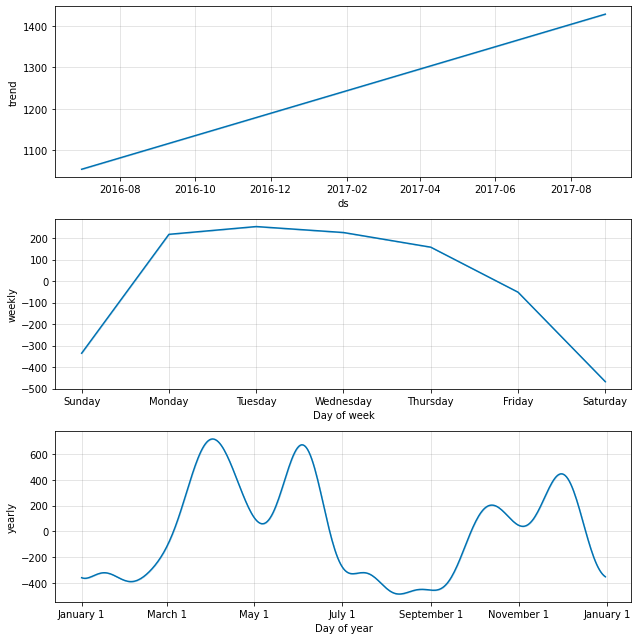

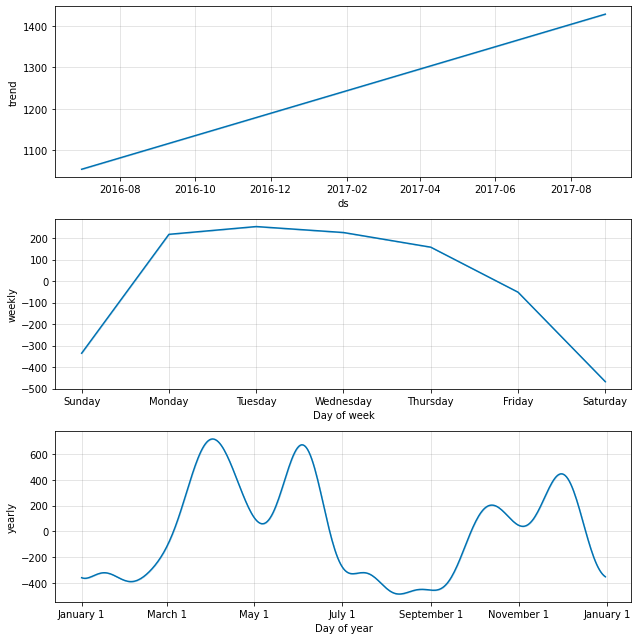

In [13]:
m.plot_components(forecast)